# First SDMS Assignment
## Deadine: 13/04/2023
### Student: Gabriele Codega

### What are these assignments?
Assignments are some exercise to do in python in a due date. They:
- are compulsory
- give from 0 to 2 **bonus points** to the exam depending on how much well they are done, so you can still take 30 cum laude even if you take 0 to all the assignments .
- at first they will be evaluated based on: correctness, speed of code execution, clarity, original ideas. The evaluation methods are in descending order.
- Because it is the first time I make assigments, I decided to make an additional rule to help you. Let $$X_{1},...X_{n}$$ the votes of the $n$ students, the vote that will be registered will be $$Y_{i}=X_{i}+[2-\max_{i}X_{i}]$$. 
- Send your assignment to my email: guglielmo.padula@studenti.units.it before the 00:00 AM of the day after the deadiline.

### What if I don't do one of them?
In case you don't manage to do all the assignments there will be a general course assigment will be published a week or two before the first exam date. There will be an exercise for each "partial" assigment (you will be required to do only the exercises corresponding to the assigments that you did not do). The additional rule for the marks may or may not hold (it will depend on the statistical sample).

### Exercise 0 (Optional)
Prove that $$P(Y_{i}\ge X_{i})=1 \quad \forall i=1...n$$ 


### Exercise 1: Monte Carlo Integration
As I already said in the first lab, let $X$ a random variable and $G$ a function such that $Var(G(X))< +\infty$ then if $x_{1},....,x_{n}$ are a sample from $X$ then $\lim \limits_{n\rightarrow +\infty} \frac{1}{n}\sum\limits_{i=1}^{n} G(x_{i})=E[G(X)]$ 

All the 2D triangles with a vertex in the origin can be described by a quadruple $P=(A,B,C,D)\in \mathbb{R}^{4}$ where $(A,B)$ and $(C,D)$ are the coordinates in the $XY$ plane of the other two vertices. 

It can be proven that with this parametrization the area of a triangle is $$Area(P)=\frac{1}{2}|A*D-B*C|=\frac{1}{2}|(A,B)\times (C,D)|$$ where $\times$ is the cross-product.

Assume that $$A\sim Beta(1,1)$$
$$B\sim Beta(1,1)$$
$$C\sim Beta(1,1)$$
$$D\sim Beta(1,1)$$
and that $A,B,C,D$ are completely independent (so you can simply sample each other independently).

Exercise: 
- 1) estimate $Area(P)$ using Monte Carlo Integration. You can sample from a beta distribution using scipy.stats.beta
- 2) (optional, you can also do this and not do 1.) the monte carlo estimation of $Area(P)$ can be calculated in only line of code (imports excluded) using numpy vectorization, try to do it. 
- 3) (optional, do only if you did both points 1. and 2.) compare the time of execution of your implementations using the function time from the python module time. Do the comparison with $n=50$, $n=500$, $n=5000$, $n=50000$.
- 4) (optional) prove that $Var(Area(P))< +\infty$


### Exercise 2: 
Let's take the Cow-Vegetation model with $r=1,k=10,\beta=1,V_{0}=1$, i.e 
$$ \dot{X}=X\left(1-\frac{X}{100}\right)-H\left(\frac{X^{2}}{X^{2}+1}\right)$$ 
where $H$ is the number of cow.
For the values of $H=1,2,3$ do the simulation with using a sequence of starting points from $0$ to $10$ (use at least $100$ intermediate points) until $t=10$ and try to understand how many equibrium points there are for each value of $H$, if they are stable or unstable and try to estimate their numerical value by looking at the graph (a nonprecise estimate is ok). Feel free to recycle my class for basic Continous Dinamical 1d systems.

### Exercise 3:
Study the following dynamical system:
$$y_{n+1}=0.5\left(y_n^2-3 y_{n}+6\right)$$ 
for starting points $y_{0}$ which range from $1$ to $3$  (use at least $100$ intermediate points) until $t=10$ and try to understand how many equibrium points there are, if they are stable or unstable and try to estimate their numerical value by looking at the graph (a nonprecise estimate is ok). Feel free to recycle my class for basic Discrete Dinamical 1d systems.

## Solution

### Exercise 0
From the definition of $Y_i$ we have
$$ P(Y_i \geq X_i) = P(X_i + 2 - \max_i X_i \geq X_i) = P(2 - \max_i X_i \geq 0) $$
Moreover, since $X_i \in [0,2] ~~ \forall~ i$, we have $ 2-\max_i X_i \geq 0 $, which means that
$$ P(Y_i \geq X_i) = P(2 - \max_i X_i \geq 0) = 1 $$

### Exercise 1

In [1]:
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def area(P):
    return 0.5 * np.abs(P[0]*P[2]-P[1]*P[3])

In [3]:
dist = beta(1,1)

In [8]:
%%time
n = 50000
areas = np.empty(n)
for i in range(n):
    areas[i] = area(np.ravel(dist.rvs(4)))
print(np.mean(areas))

0.12001998421000161
CPU times: user 2.71 s, sys: 23.4 ms, total: 2.74 s
Wall time: 2.8 s


In one line, using numpy vectorisation:

In [90]:
%%time
np.mean(np.vectorize(area,signature='(4) -> ()')(dist.rvs((n,4))))

CPU times: user 178 ms, sys: 2.34 ms, total: 181 ms
Wall time: 180 ms


0.12071365786184125

By repeating the simulation for increasing `n` we can see that `np.vectorise` makes the computation much faster as `n` increases.

We can see that the distribution of areas is very skewed to the right, yet bounded by $0.5$, which is indeed the maximum possible value given the distribution of $A,B,C,D$.
The variace of $Area$ is indeed finite:
$$\begin{align*}
Var(Area) &\approx \frac{1}{4}[B^2~Var(A)+A^2~Var(B)+D^2~Var(C)+C^2~Var(D)] \\
&= \frac{Var(A)}{4} [B^2+A^2+D^2+C^2] \\
&\leq \frac{4}{4\cdot 12} = \frac{1}{12}
\end{align*} $$
Where we use that $Var(A)=\frac{1}{12}$ and that $A,B,C,D \in [0,1]$.

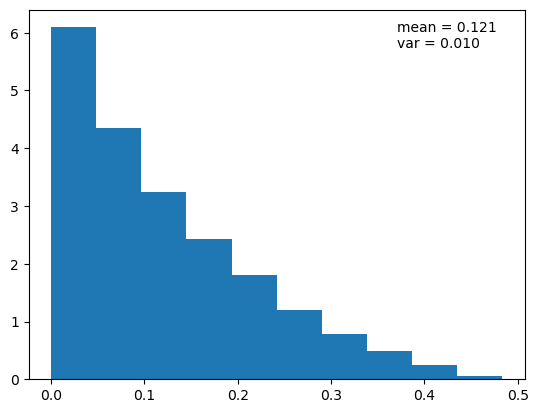

In [102]:
fig, ax = plt.subplots()
fig.text(0.7,0.8,f"mean = {np.mean(areas):.3f}\nvar = {np.var(areas):.3f}")
_ = ax.hist(areas, density=True)

### Exercise 2

In [166]:
class CowVegSystem():
    def __init__(self, r,k,beta,v0,H):
        self.r = r
        self.k = k
        self.beta = beta
        self.v0 = v0
        self.H = H

        self.equation = lambda x: x*(r-x/k) - H*(beta*x*x/(v0*v0+x*x))

    def integrate_euler(self,t0,t1,N,x0):
        h = (t1-t0)/N
        xs = np.zeros(N+1)
        xs[0] = x0
        for i in range(1,N+1):
            xs[i] = xs[i-1] + h*self.equation(xs[i-1])
        return xs


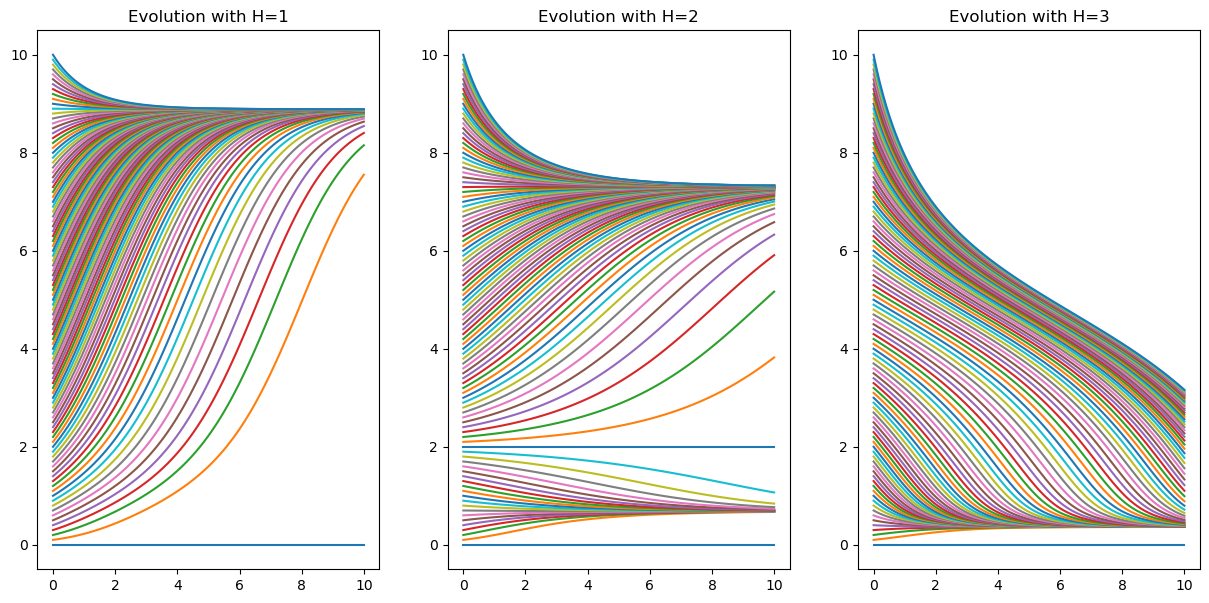

In [192]:
H = [1,2,3]
ax = []
fig, ax = plt.subplots(1,3,figsize=(15,7))

for h in range(len(H)):
    system = CowVegSystem(1,10,1,1,H[h])
    t0 = 0
    t1 = 10
    N = 100
    nx = 101
    t = np.linspace(t0,t1,N+1)
    x = np.linspace(0,10,nx)
    evolutions = np.zeros((nx,N+1))
    for i in range(len(x)):
        evolutions[i,:] = system.integrate_euler(t0,t1,N,x[i])
    axis = ax.ravel()[h]
    axis.plot(t, evolutions.T)
    axis.set_title(f"Evolution with H={H[h]:d}")


By looking at the plots of the system's evolution for different initial conditions and different $H$, we can see that for all values of $H$, zero is an unstable equilibrium point. Moreover, for $H=1$ there is a stable equilibrium at $\approx 9$, for $H=2$ there are three more equilibria (stable, unstable and stable) at $\approx 0.7, 2, 7.5$, and for $H=3$ there is a stable equilibrium at $\approx 0.5$.

### Exercise 3

In [203]:
class DiscreteDS():
    def __init__(self):
        self.equation = lambda x: 0.5*(x*x-3*x+6)

    def solve(self,Nsteps,x0):
        xs = np.zeros(Nsteps+1)
        xs[0] = x0
        for i in range(1,Nsteps+1):
            xs[i] = self.equation(xs[i-1])
        return xs

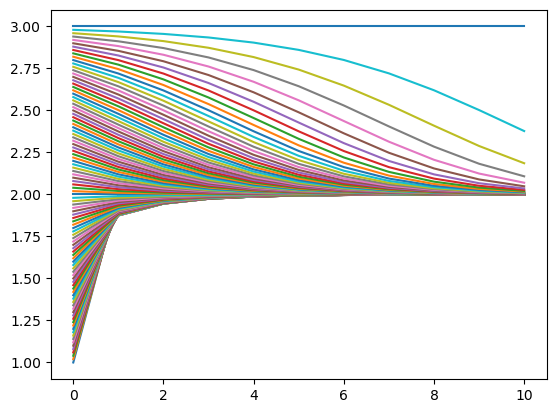

In [206]:
system = DiscreteDS()
Nsteps = 10
y0 = np.linspace(1,3,101)
evolutions = np.zeros((101,Nsteps+1))
for i in range(len(y0)):
        evolutions[i,:] = system.solve(Nsteps,y0[i])

fig, ax = plt.subplots()

_= ax.plot(range(Nsteps+1),evolutions.T)

By looking at the plot there seem to be two equilibria, for $y = 2$ (stable) and $y=3$ (unstable). Indeed it easy to check that these are the solutions to 
$$ y = 0.5(y^2-3y+6) $$